In [139]:
# tools for handling files
import sys
import os

# pandas/numpy for handling data
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

# seaborn/matplotlib for graphing
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from ptitprince import PtitPrince as pt

# statistics
from statistics import mean 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# for reading individual telomere length data from files
from ast import literal_eval

# for grabbing individual cells
import more_itertools

In [140]:
chr_data = 'Chromosome_Aberrations_telodGH_unrelatedAstros+SK_complete_TeloAberr_astros125___graphs_7_17_19_227pm.xlsx'
nasa_chr_data = pd.read_excel(chr_data)

In [141]:
#pre-flight chr aberr data
pre_f = nasa_chr_data.iloc[0:404, 1:15]
#grabbing column names to avoid formatting errors from excel
chr_aberr_cols = pre_f.columns

In [142]:
chr_aberr_cols = ['astro id', 'flight status', 'cell number', 'image file number', 
                  'dicentrics', 'translocations', 'inversions', 
                  'terminal inversions', 'terminal SCEs paint cis', 
                  'terminal SCEs dark cis', 'subtelo SCEs', 
                  'sister chromatid exchanges', 'insertions', 'satellite associations']

In [143]:
pre_f.columns = chr_aberr_cols

#mid-flight 1 chr aberr data
mid_f_1 = nasa_chr_data.iloc[35:109, 25:39]
mid_f_1.columns = chr_aberr_cols

#mid-flight 2 chr aberr data
mid_f_2 = nasa_chr_data.iloc[0:111, 49:63]
mid_f_2.columns = chr_aberr_cols

#post-flight chr aberr data
post_f = nasa_chr_data.iloc[0:400, 96:110]
post_f.columns = chr_aberr_cols

In [144]:
all_astro_chr_aberr = pd.concat([pre_f, mid_f_1, mid_f_2, post_f], axis=0, ignore_index=True)
all_astro_chr_aberr = all_astro_chr_aberr.drop(['cell number', 'image file number', 'insertions'], 
                                               axis=1).dropna().reset_index(drop=True)
print(all_astro_chr_aberr.columns)
all_astro_chr_aberr.head(4)

Index(['astro id', 'flight status', 'dicentrics', 'translocations',
       'inversions', 'terminal inversions', 'terminal SCEs paint cis',
       'terminal SCEs dark cis', 'subtelo SCEs', 'sister chromatid exchanges',
       'satellite associations'],
      dtype='object')


,astro id,flight status,dicentrics,translocations,inversions,terminal inversions,terminal SCEs paint cis,terminal SCEs dark cis,subtelo SCEs,sister chromatid exchanges,satellite associations
0,2171,pre-flight,0,0,0,0,2,0,1,1,0
1,2171,pre-flight,0,0,0,0,0,0,0,0,0
2,2171,pre-flight,0,1,0,0,1,0,0,0,0
3,2171,pre-flight,0,0,0,0,1,0,1,0,0


In [146]:
all_astro_chr_aberr['total inversions'] = all_astro_chr_aberr['terminal inversions'] + all_astro_chr_aberr['inversions']
all_astro_chr_aberr['terminal SCEs'] = all_astro_chr_aberr['terminal SCEs paint cis'] + all_astro_chr_aberr['terminal SCEs dark cis']

combine_inv_termSCEs_all_astro_chr_aberr = all_astro_chr_aberr.drop(['terminal inversions', 'inversions', 
                                                                     'terminal SCEs paint cis', 'terminal SCEs dark cis'], axis=1)

In [148]:
# all_astro_chr_aberr

In [8]:
melt_all_astro_chr_aberr = pd.melt(combine_inv_termSCEs_all_astro_chr_aberr,
       id_vars=['astro id', 'flight status'],
       var_name='aberration type',
       value_name='count per cell')

melt_all_astro_chr_aberr.head(4)

,astro id,flight status,aberration type,count per cell
0,2171,pre-flight,dicentrics,0
1,2171,pre-flight,dicentrics,0
2,2171,pre-flight,dicentrics,0
3,2171,pre-flight,dicentrics,0


Text(0.5, 1.0, 'chr aberr by subtelo dgh: 11 astros, pre-, mid1/2-, post-')

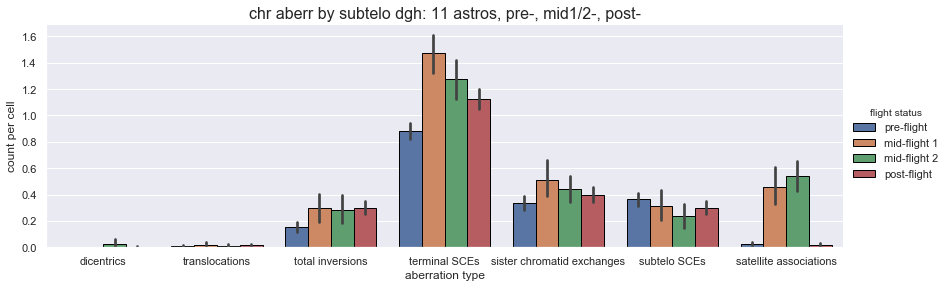

In [14]:
order_cat=['dicentrics', 'translocations', 'total inversions', 'terminal SCEs',
           'sister chromatid exchanges', 'subtelo SCEs', 'satellite associations']

ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='flight status', kind='bar', order=order_cat,                                         
                 orient='v', height=4, aspect=3, data=melt_all_astro_chr_aberr)

plt.title('chr aberr by subtelo dgh: 11 astros, pre-, mid1/2-, post-', fontsize=16)
# height=10, aspect=2.5,


In [99]:
mid_combined1 = all_astro_chr_aberr.replace('mid-flight 1', 'mid-flight')
mid_combined = mid_combined1.replace('mid-flight 2', 'mid-flight')

# int64 to avoid making a str ending w/ .0, i.e 2171.0
mid_combined['astro id'] = mid_combined['astro id'].astype('int64')

# then to str to enable string matching
mid_combined['astro id'] = mid_combined['astro id'].astype('str')

In [100]:
mid_combined = pd.melt(mid_combined,
       id_vars=['astro id', 'flight status'],
       var_name='aberration type',
       value_name='count per cell')


In [101]:
# ax = sns.set(font_scale=1)
# ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
# ax = sns.catplot(x='aberration type', y='count per cell', 
#                  hue='flight status', kind='bar', order=order_cat,                                         
#                  orient='v', height=4, aspect=3, data=mid_combined)

# plt.title('chr aberr by subtelo dgh: 11 astros, pre-, mid-, post-', fontsize=16)

In [106]:
mid_flight_only_astros = mid_combined[(mid_combined['astro id'] == '2171') | 
                                      (mid_combined['astro id'] == '1536') |
                                      (mid_combined['astro id'] == '5163')]

In [160]:
print(mid_flight_only_astros[(mid_flight_only_astros['flight status'] == 'pre-flight') &
                       (mid_flight_only_astros['aberration type'] == 'total inversions')]['count per cell'].mean(axis=0),

mid_flight_only_astros[(mid_flight_only_astros['flight status'] == 'mid-flight') &
                       (mid_flight_only_astros['aberration type'] == 'total inversions')]['count per cell'].mean(axis=0))

stats.ttest_ind(pre, mid, equal_var=True, axis=0)

# pre

0.15315315315315314 0.2864864864864865


Ttest_indResult(statistic=-2.1812250417756456, pvalue=0.029958933114816063)

In [131]:
mid_combined['aberration type'].unique()

array(['dicentrics', 'translocations', 'inversions',
       'terminal inversions', 'terminal SCEs paint cis',
       'terminal SCEs dark cis', 'subtelo SCEs',
       'sister chromatid exchanges', 'satellite associations',
       'total inversions', 'terminal SCEs'], dtype=object)

Text(0.5, 1.0, 'chr aberr by subtelo dgh: 3 astros, pre-, mid-, post-')

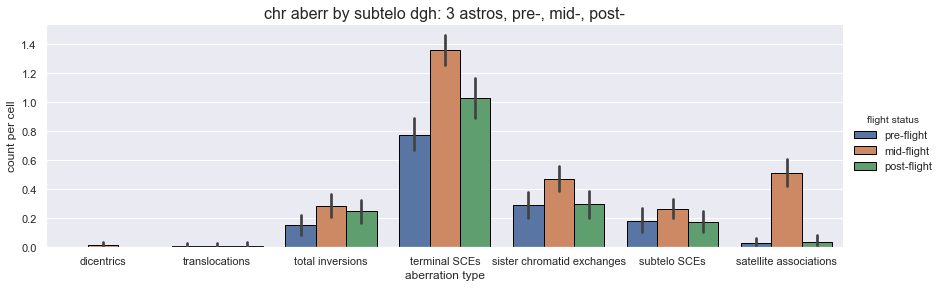

In [124]:
order_cat=['dicentrics', 'translocations', 'total inversions', 'terminal SCEs',
           'sister chromatid exchanges', 'subtelo SCEs', 'satellite associations']

ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='flight status', kind='bar', order=order_cat,                                         
                 orient='v', height=4, aspect=3, data=mid_flight_only_astros)

plt.title('chr aberr by subtelo dgh: 3 astros, pre-, mid-, post-', fontsize=16)

In [35]:
mid_flight_removed = mid_combined[mid_combined['flight status'] != 'mid-flight']

Text(0.5, 1.0, 'chr aberr by subtelo dgh: 11 astros, pre-, post-')

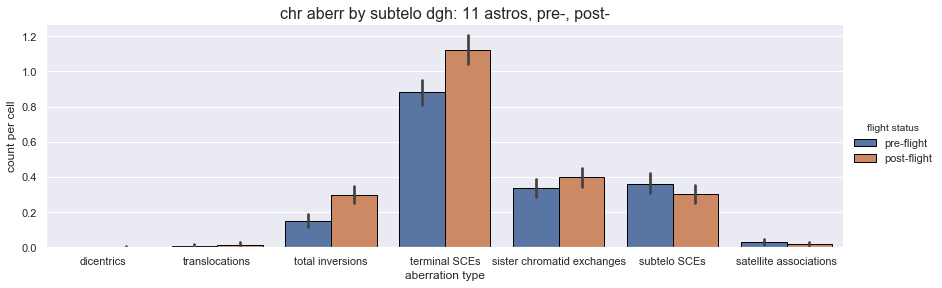

In [36]:
ax = sns.set(font_scale=1)
ax = sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.catplot(x='aberration type', y='count per cell', 
                 hue='flight status', kind='bar', order=order_cat,                                         
                 orient='v', height=4, aspect=3, data=mid_flight_removed)

plt.title('chr aberr by subtelo dgh: 11 astros, pre-, post-', fontsize=16)

In [38]:
all_astro_chr_aberr.to_csv('All_astronauts_chromosome_aberration_data.csv')
melt_all_astro_chr_aberr.to_csv('All_astronauts_chromosome_aberration_data_tidy_data_format.csv')